# Are Fandango Movie Ratings Still Inflated?

In this project, we will investigate [Fandango](https://www.fandango.com/) movie ratings to determine how their ratings have changed between movies released in 2015 and movies released in 2016. Our analysis will use two datasets, comprising [Fandango's rating system pre-Walt Hickey's analysis in 2015](https://github.com/fivethirtyeight/data/tree/master/fandango) and [post-Hickey's analysis](https://github.com/mircealex/Movie_ratings_2016_17). For context, in 2015 Walt Hickey discovered that Fandango's movie ratings were essentially on a 3 to 5 stars scale, instead of the conventional 0 to 5 stars scale. We will figure out if this remains the case after his article.

## Exploring the Data
We will start by reading in the data and filter our data for only movies released in 2015 and 2016.

In [63]:
# Reading in the data
import pandas as pd

fsc = pd.read_csv('fandango_score_comparison.csv')
ratings = pd.read_csv('movie_ratings_16_17.csv')

fsc.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [62]:
ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We'll need to isolate the relevant columns for our analysis.

In [ ]:
# Isolating relevant columns
fsc = fsc[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
ratings = ratings[['movie', 'year', 'fandango']]

# Filtering movies from 2015
movies_2015_mask = fsc['FILM'].str.contains('2015')
movies_2015 = fsc[movies_2015_mask]

# Filtering movies from 2016
movies_2016 = ratings[ratings['year'] == 2016]

## Comparing Distribution Shapes for 2015 and 2016.

Our goal is to determine whethere there's a difference between Fandango's 2015 movie ratings and Fandango's 2016 movie ratings. We'll accomplish this by comparing the distributions of the movie ratings.

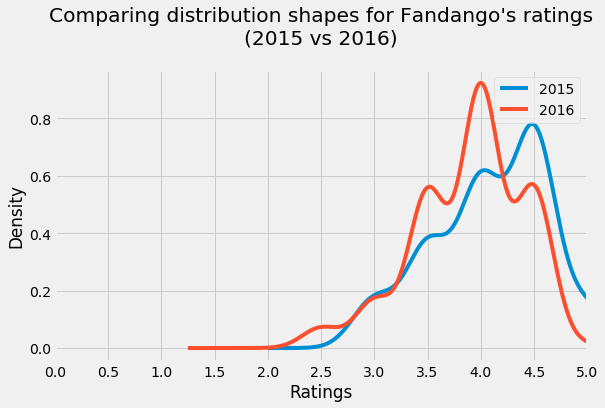

In [59]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, 
                                             figsize = (8.5, 5))
movies_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
         y = 1.07) # The y moves the title upward
plt.xlabel('Ratings')
plt.xlim(0, 5) # Ratings range from 0 to 5
plt.xticks(arange(0, 5.1, 0.5))
plt.show()

We notice several things in the graph:
- The distributions are heavily left-skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango were given high fan ratings. Taking into account that Fandango sells tickets, the high ratings are a bit questionable.

The difference suggests there that Fandango rated 2016 movies slightly lower than 2015 movies. It's important to note this as Fandango's "biased" rating system was exposed in 2015 by Walt Hickey. 

Let's take a look at their proportions in detail.

In [52]:
print('2015' + '\n' + '-' * 16) # Specifying that it's 2015
movies_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [54]:
print('2016' + '\n' + '-' * 16) # Specifying that it's 2016
movies_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The 2016 table has a lot smaller percentage of movies with a 5 star rating, compared to the 2015 table (0.5% versus ~7%). Also, there are 2016 movies with 2.5 star ratings, while there are none for 2015. Let's see the mean, median, and mode for each distribution, and compare them.

In [55]:
mean_2015 = movies_2015['Fandango_Stars'].mean()
mean_2016 = movies_2016['fandango'].mean()

median_2015 = movies_2015['Fandango_Stars'].median()
median_2016 = movies_2016['fandango'].median()

mode_2015 = movies_2015['Fandango_Stars'].mode()[0]
mode_2016 = movies_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


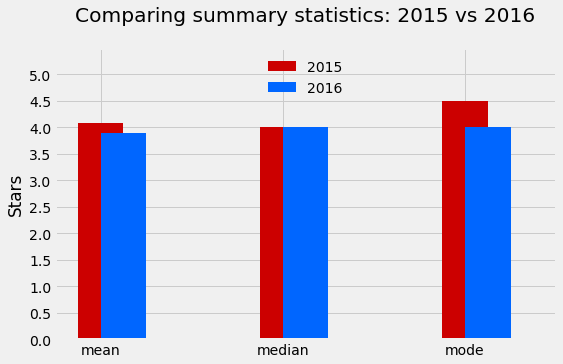

In [58]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#CC0000', align = 'center', label = '2015', width = 0.25)
summary['2016'].plot.bar(color = '#0066FF', align = 'edge', label = '2016', width = 0.25,
                        rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0, 5.5)
plt.yticks(arange(0, 5.1, 0.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Movies from 2015 seem to have a higher mean rating than movies from 2016. This trend appears to be the same for their mode rating. However, they share the same median rating.

## Conclusion

We found a slight difference between Fandango's 2015 movie ratings and Fandango's 2016 movie ratings--the 2016 movie ratings were slightly lower than the 2015 movie ratings. There's a possibility that after Hickey's analysis in 2015, Fandango adjusted their biased rating system. 